<a href="https://colab.research.google.com/github/brenosyperrek/pandas_time_series/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Alucar - Analisando as Vendas

In [2]:
import pandas as pd

In [3]:
alucar = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/panda_time_series/dados/alucar.csv')
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [4]:
print('Quantidade de linhas e colunas: ', alucar.shape)

Quantidade de linhas e colunas:  (24, 2)


In [5]:
print("Quantidade de dados nulos: ", alucar.isnull().sum().sum())

Quantidade de dados nulos:  0


In [6]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [7]:
alucar.mes = pd.to_datetime(alucar.mes)
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
sns.__version__

'0.11.2'

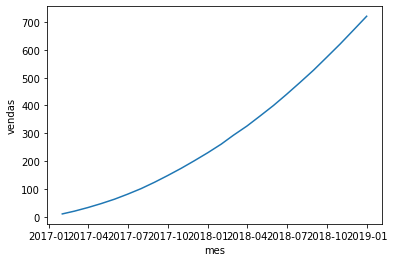

In [10]:
sns.lineplot(x='mes', y='vendas', data=alucar)

In [11]:
def plotar (titulo, labelx, labely, x, y, dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x=x, y=y, data=dataset)
  ax.figure.set_size_inches(12,6)
  ax.set_title(titulo, loc = 'left', fontsize = 18)
  ax.set_xlabel(labelx, fontsize=14)
  ax.set_ylabel(labely, fontsize=14)
  ax = ax

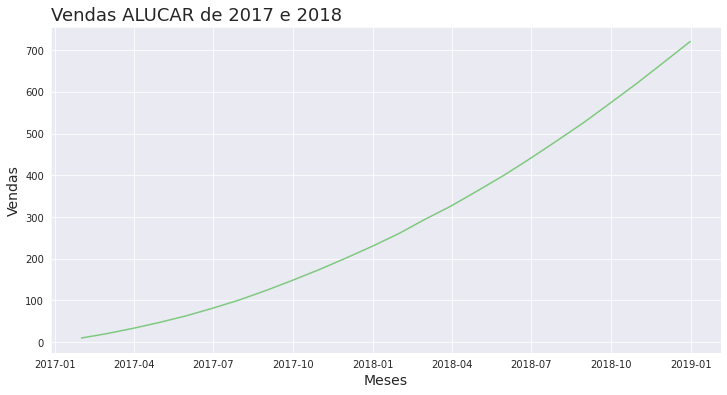

In [12]:
plotar('Vendas ALUCAR de 2017 e 2018', 'Meses', 'Vendas', 'mes', 'vendas', alucar)

In [13]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head

<bound method NDFrame.head of           mes  vendas  aumento
0  2017-01-31      10      NaN
1  2017-02-28      20     10.0
2  2017-03-31      33     13.0
3  2017-04-30      47     14.0
4  2017-05-31      63     16.0
5  2017-06-30      81     18.0
6  2017-07-31     101     20.0
7  2017-08-31     124     23.0
8  2017-09-30     148     24.0
9  2017-10-31     174     26.0
10 2017-11-30     201     27.0
11 2017-12-31     230     29.0
12 2018-01-31     261     31.0
13 2018-02-28     293     32.0
14 2018-03-31     326     33.0
15 2018-04-30     362     36.0
16 2018-05-31     400     38.0
17 2018-06-30     440     40.0
18 2018-07-31     483     43.0
19 2018-08-31     527     44.0
20 2018-09-30     573     46.0
21 2018-10-31     621     48.0
22 2018-11-30     670     49.0
23 2018-12-31     721     51.0>

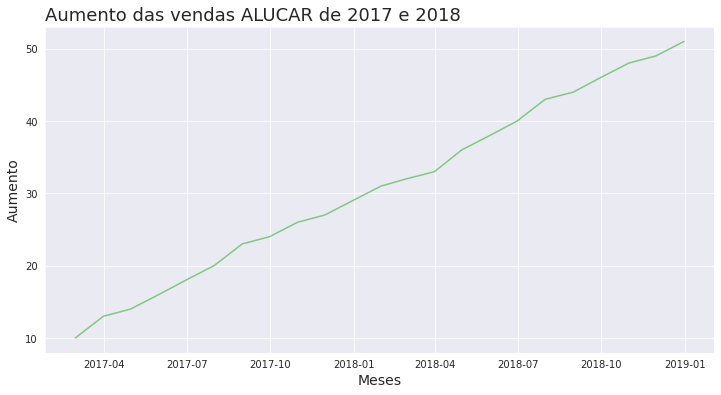

In [14]:
plotar('Aumento das vendas ALUCAR de 2017 e 2018', 'Meses', 'Aumento', 'mes', 'aumento', alucar)

In [15]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


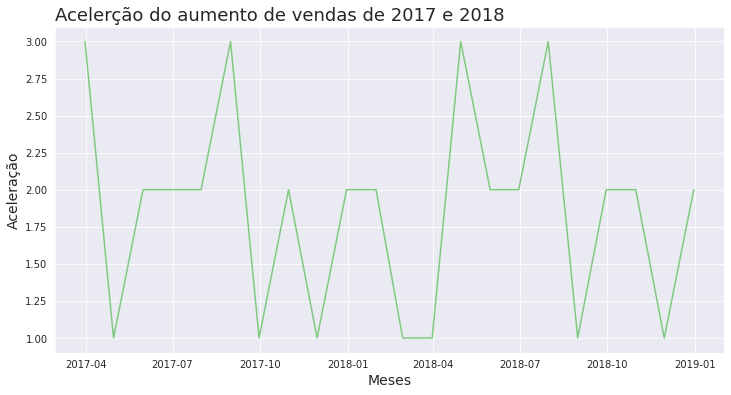

In [16]:
plotar('Acelerção do aumento de vendas de 2017 e 2018', 'Meses', 'Aceleração', 'mes', 'aceleracao', alucar)

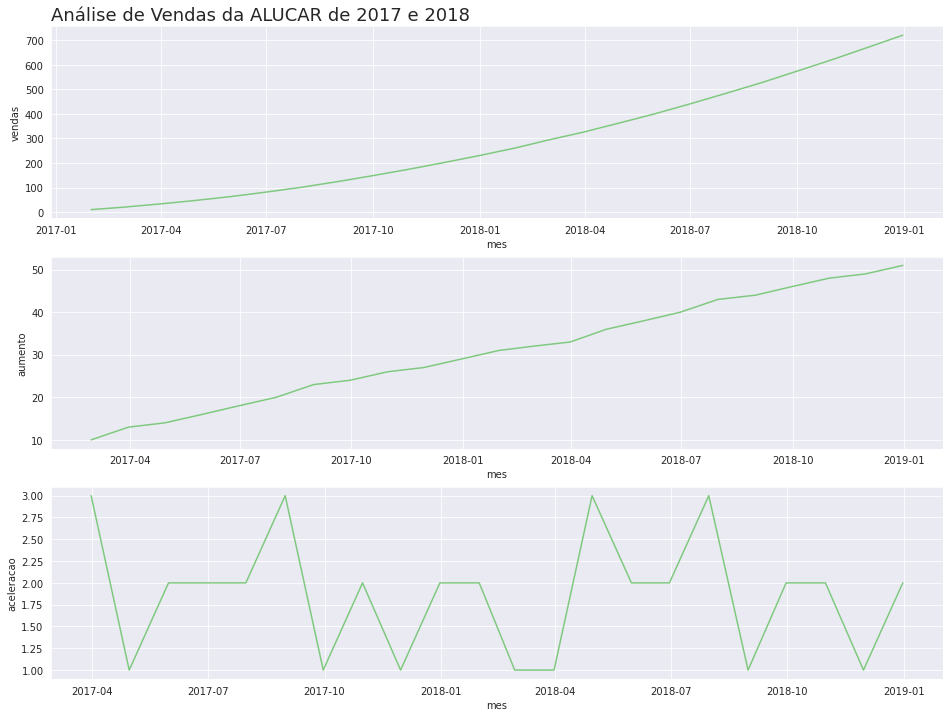

In [17]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Análise de Vendas da ALUCAR de 2017 e 2018', fontsize=18, loc='left')
sns.lineplot(x='mes', y='vendas', data=alucar)
plt.subplot(3,1,2)
sns.lineplot(x='mes', y='aumento', data=alucar)
plt.subplot(3,1,3)
sns.lineplot(x='mes', y='aceleracao', data=alucar)
ax=ax


In [18]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
  plt.figure(figsize=(16,12))
  ax = plt.subplot(3,1,1)
  ax.set_title(titulo, fontsize=18, loc='left')
  sns.lineplot(x=x, y=y1, data=dataset)
  plt.subplot(3,1,2)
  sns.lineplot(x=x, y=y2, data=dataset)
  plt.subplot(3,1,3)
  sns.lineplot(x=x, y=y3, data=dataset)
  ax=ax

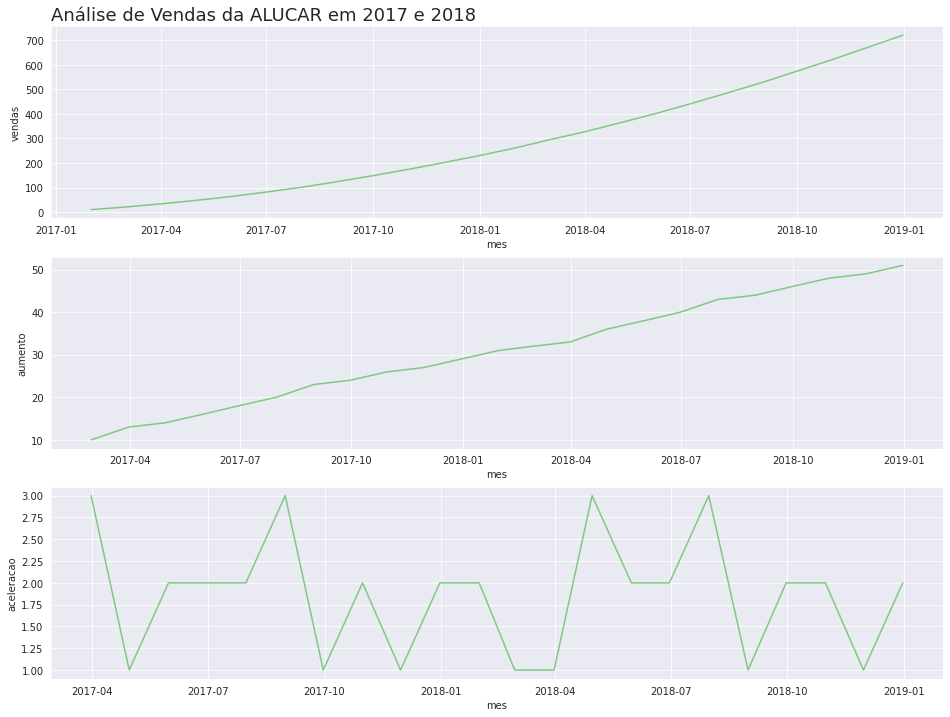

In [19]:
plot_comparacao('mes','vendas','aumento','aceleracao', alucar, 'Análise de Vendas da ALUCAR em 2017 e 2018')

In [20]:
from pandas.plotting import autocorrelation_plot

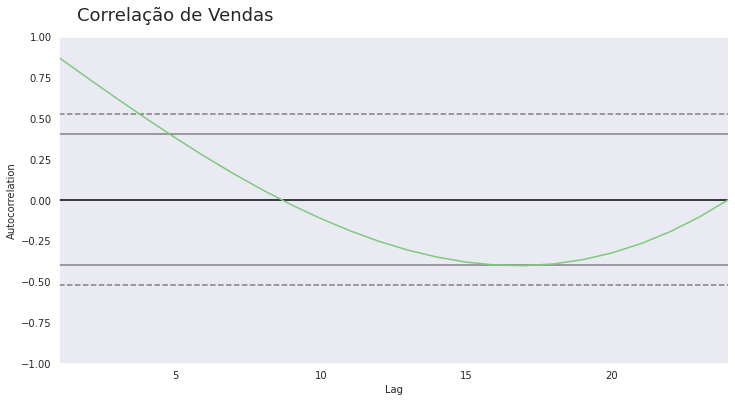

In [21]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação de Vendas', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar.vendas)

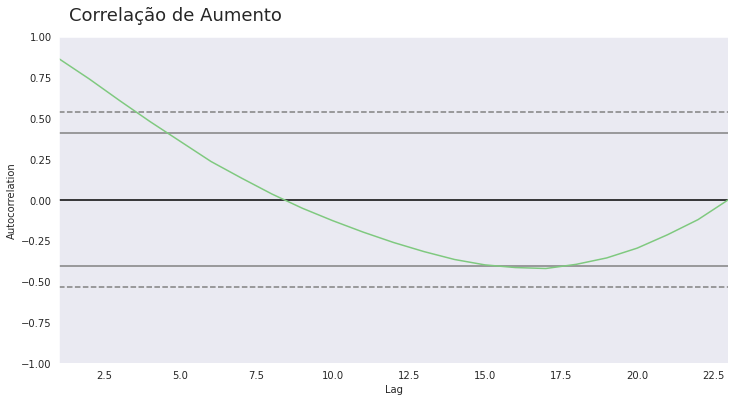

In [22]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação de Aumento', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar.aumento[1:])

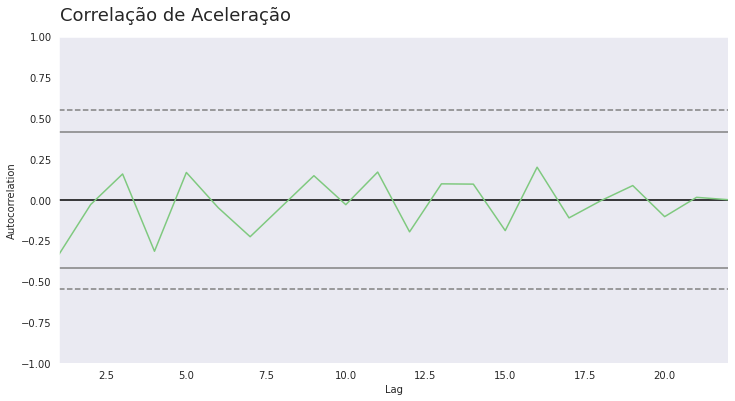

In [23]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação de Aceleração', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar.aceleracao[2:])

# Alucar - Analisando Assinantes da Newsletter

In [24]:
assinantes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/panda_time_series/dados/newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [25]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [26]:
print('Quantidade de linhas e colunas: ', assinantes.shape)
print('Quantidade de dados nulos: ', assinantes.isnull().sum().sum())

Quantidade de linhas e colunas:  (24, 2)
Quantidade de dados nulos:  0


In [27]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [28]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


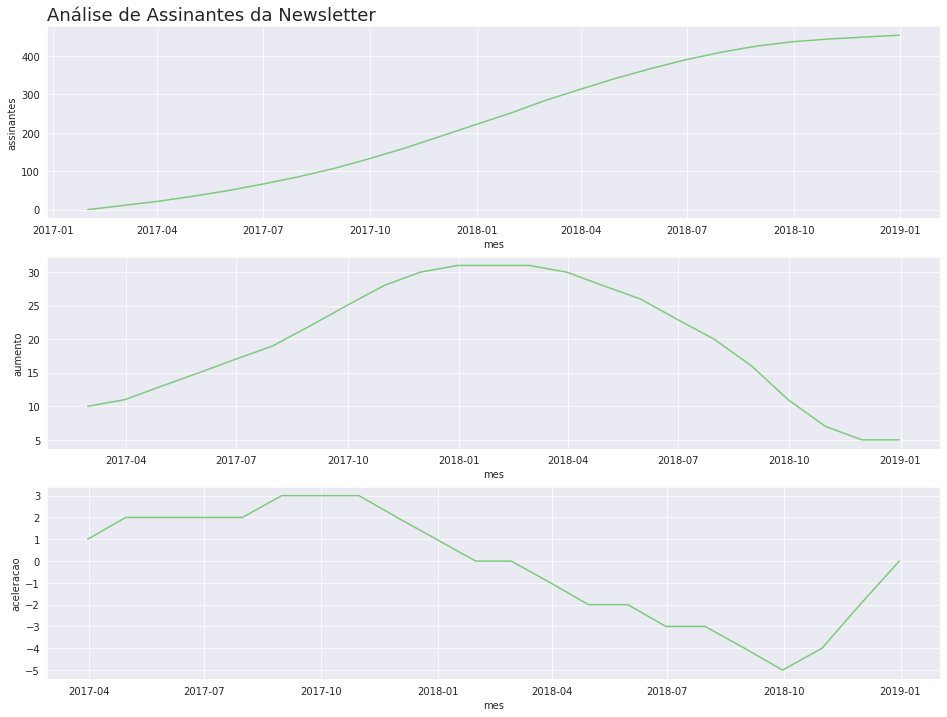

In [29]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao',assinantes, 'Análise de Assinantes da Newsletter')

#Análise de Vendas Chocolura

In [30]:
choco = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/panda_time_series/dados/chocolura.csv')
choco.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [31]:
choco.dtypes

mes       object
vendas     int64
dtype: object

In [32]:
choco['mes'] = pd.to_datetime(choco['mes'])
choco.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [33]:
print('Quantidade de linhas e colunas: ', choco.shape)
print('Quantidade de dados faltantes: ', choco.isnull().sum().sum())

Quantidade de linhas e colunas:  (24, 2)
Quantidade de dados faltantes:  0


In [34]:
choco['aumento'] = choco['vendas'].diff()
choco['aceleracao'] = choco['aumento'].diff()
choco.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


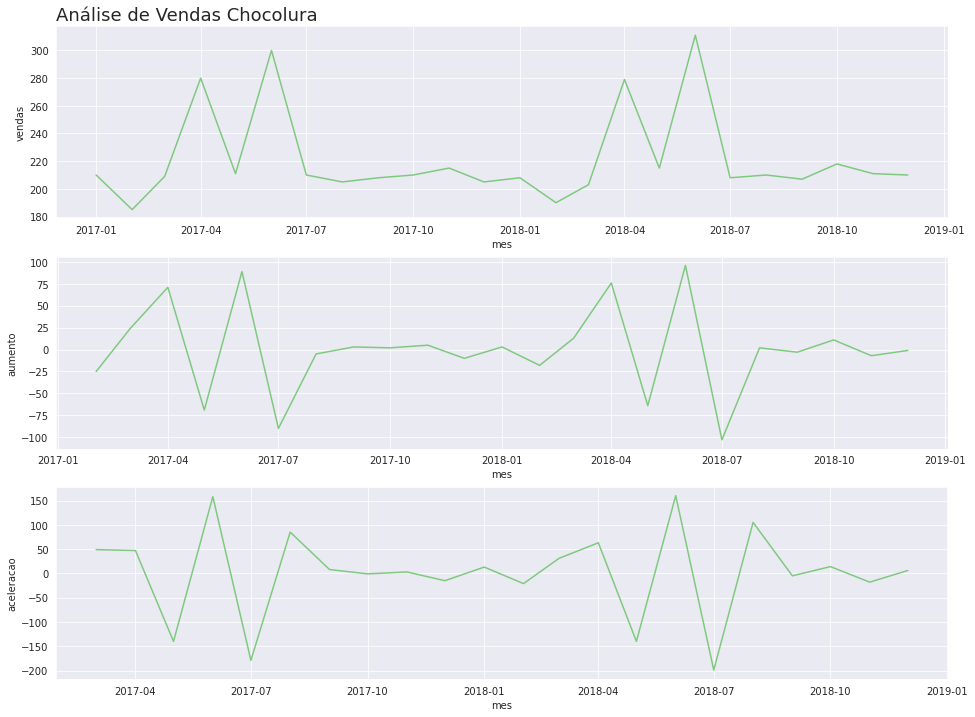

In [35]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', choco, 'Análise de Vendas Chocolura')

#Chocolura - Vendas diárias (Outubro e Novembro)

In [36]:
vendas_dia = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/panda_time_series/dados/vendas_por_dia.csv')
vendas_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [37]:
print('Quantidade de linhas e colunas: ', vendas_dia.shape)
print('Quantidade de dados nulos: ', vendas_dia.isna().sum().sum())

Quantidade de linhas e colunas:  (61, 2)
Quantidade de dados nulos:  0


In [38]:
vendas_dia.dtypes

dia       object
vendas     int64
dtype: object

In [39]:
vendas_dia['dia'] = pd.to_datetime(vendas_dia['dia'])
vendas_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [40]:
vendas_dia['aumento'] = vendas_dia['vendas'].diff()
vendas_dia['aceleracao'] = vendas_dia['aumento'].diff()
vendas_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


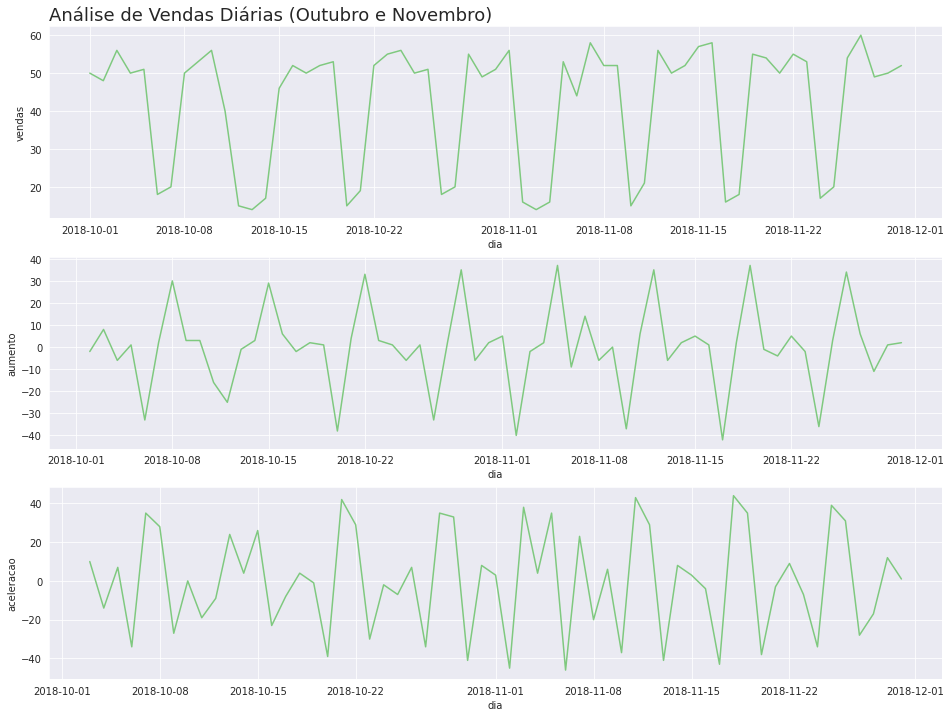

In [41]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', vendas_dia, 'Análise de Vendas Diárias (Outubro e Novembro)')

## Analisando a sanonalidade

In [42]:
vendas_dia['dia_da_semana'] = vendas_dia['dia'].dt.strftime('%A')
vendas_dia.head()


,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


In [43]:
vendas_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [44]:
dias_traduzidos = {'Monday' : 'Segunda-Feira', 'Tuesday' : 'Terça-Feira', 'Wednesday' : 'Quarta-Feira', 'Thursday' : 'Quinta-Feira', 'Friday' : 'Sexta-Feira', 'Saturday' : 'Sábado','Sunday' : 'Domingo'}

In [45]:
vendas_dia['dia_da_semana'] = vendas_dia['dia_da_semana'].map(dias_traduzidos)
vendas_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda-Feira
1,2018-10-02,48,-2.0,NaN,Terça-Feira
2,2018-10-03,56,8.0,10.0,Quarta-Feira
3,2018-10-04,50,-6.0,-14.0,Quinta-Feira
4,2018-10-05,51,1.0,7.0,Sexta-Feira


## Agrupando os dias

In [46]:
vendas_agrupadas = vendas_dia.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()
vendas_agrupadas

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta-Feira,53.0,1.0,2.0
Quinta-Feira,51.0,-2.0,-3.0
Segunda-Feira,52.0,34.0,31.0
Sexta-Feira,45.0,-7.0,-5.0
Sábado,16.0,-28.0,-20.0
Terça-Feira,52.0,-1.0,-34.0


Correlação das vendas diárias

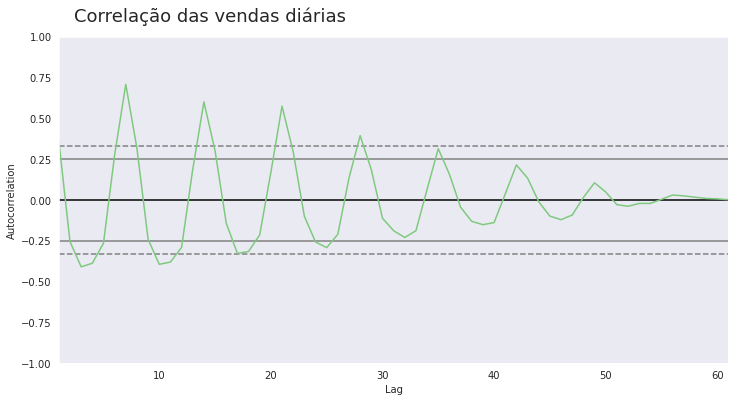

In [47]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_dia['vendas'])
ax = ax

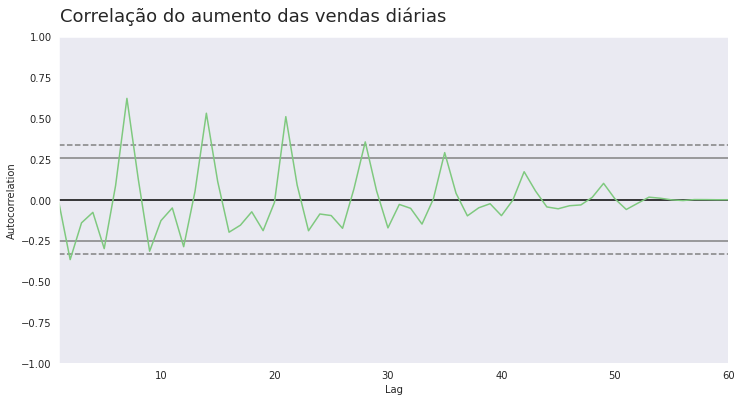

In [48]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento das vendas diárias', fontsize=18, x=0.35, y=0.95)
autocorrelation_plot(vendas_dia['aumento'][1:])
ax = ax

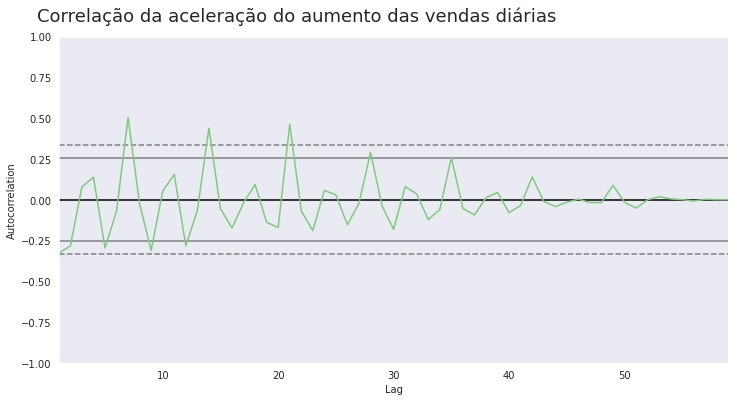

In [49]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração do aumento das vendas diárias', fontsize=18, x=0.40, y=0.95)
autocorrelation_plot(vendas_dia['aceleracao'][2:])
ax = ax

In [50]:
cafelura = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/panda_time_series/dados/cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [51]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [52]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [53]:
print('Quantidade de linhas e colunas: ', cafelura.shape)
print('Quantidade de dados nulos: ', cafelura.isna().sum().sum())

Quantidade de linhas e colunas:  (24, 2)
Quantidade de dados nulos:  0


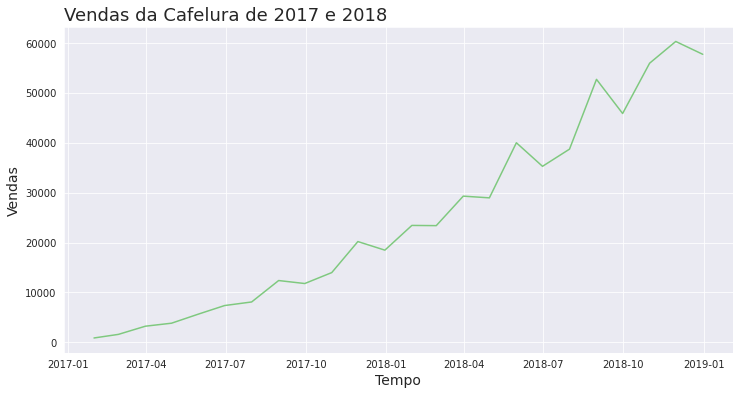

In [54]:
plotar('Vendas da Cafelura de 2017 e 2018', 'Tempo', 'Vendas', 'mes', 'vendas', cafelura)

In [55]:
quantidades_de_dias_de_fds = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/panda_time_series/dados/dias_final_de_semana.csv')
quantidades_de_dias_de_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [56]:
quantidades_de_dias_de_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8])

In [57]:
cafelura['vendas_normalizadas'] = cafelura['vendas']/quantidades_de_dias_de_fds['quantidade_de_dias'].values
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


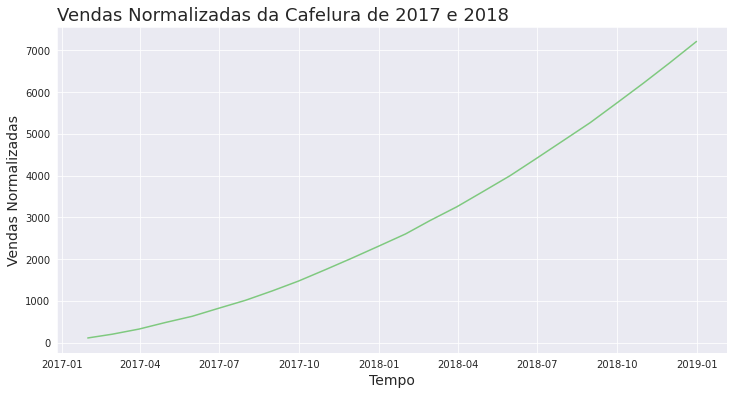

In [58]:
plotar('Vendas Normalizadas da Cafelura de 2017 e 2018', 'Tempo', 'Vendas Normalizadas', 'mes', 'vendas_normalizadas', cafelura)

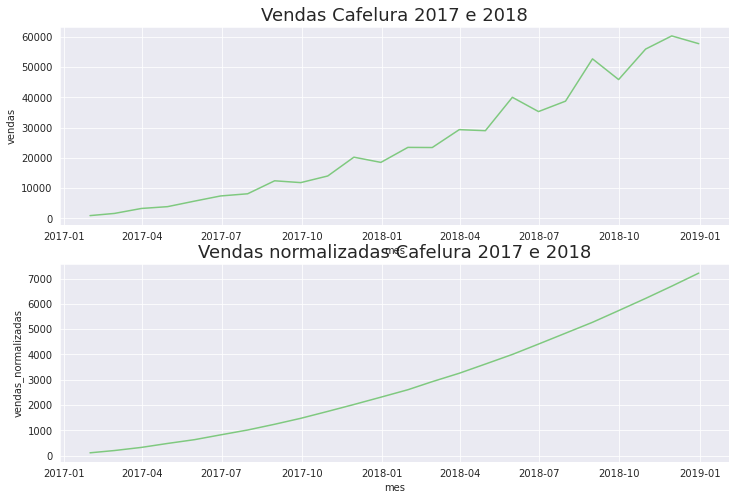

In [59]:
plt.figure(figsize=(12,8))
ax=plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas', data=cafelura)
ax=plt.subplot(2,1,2)
ax.set_title('Vendas normalizadas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafelura)
ax=ax 

# Statsmodels

In [60]:
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


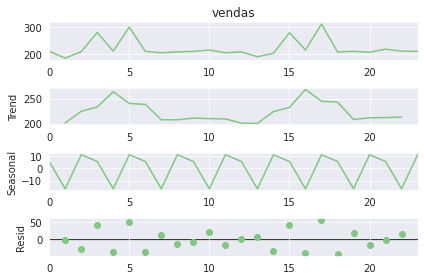

In [61]:
resultado = seasonal_decompose(choco['vendas'],  freq=3)
ax = resultado.plot()

In [62]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [63]:
data = ({
       'observacao':observacao,
       'tendencia':tendencia, 
       'sazonalidade':sazonalidade,
       'ruido':ruido
})
resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210.0,NaN,5.603175,NaN
1,185.0,201.333333,-16.730159,0.396825
2,209.0,224.666667,11.126984,-26.793651
3,280.0,233.333333,5.603175,41.063492
4,211.0,263.666667,-16.730159,-35.936508


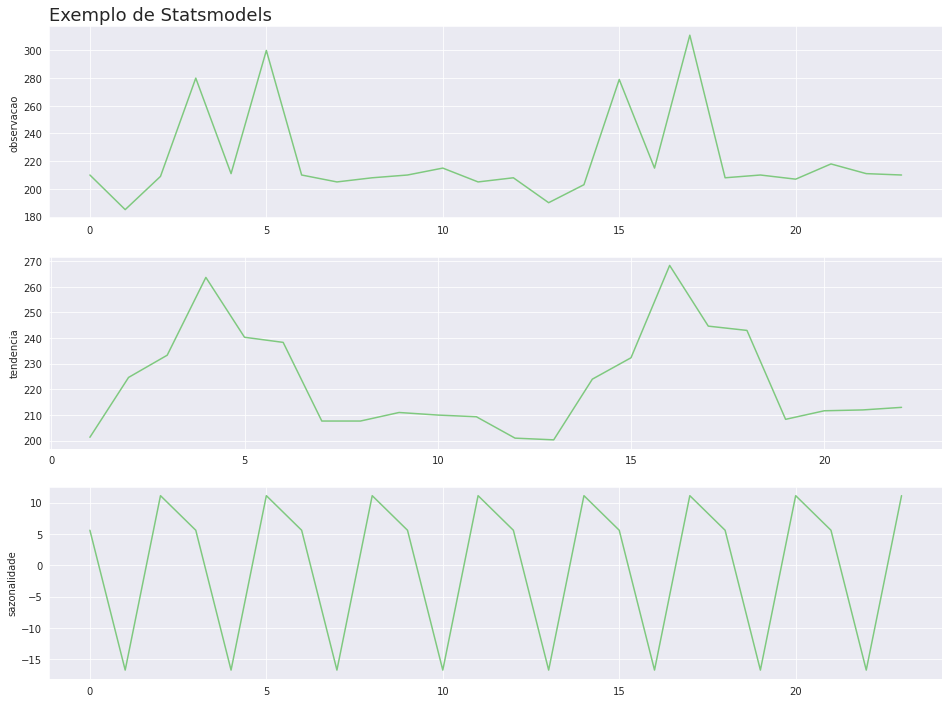

In [64]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'sazonalidade', resultado, 'Exemplo de Statsmodels')

# Alucel análise de vendas

In [65]:
alucel = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/panda_time_series/dados/alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [66]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [67]:
alucel['dia'] = pd.to_datetime(alucel['dia'])
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [68]:
print ('Número de linhas e colunas: ', alucel.shape)
print ('Quantidade de dados nulos: ', alucel.isna().sum().sum())

Número de linhas e colunas:  (61, 2)
Quantidade de dados nulos:  0


In [69]:
alucel['aumento'] = alucel['vendas'].diff()
alucel['aceleracao'] = alucel['aumento'].diff()
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


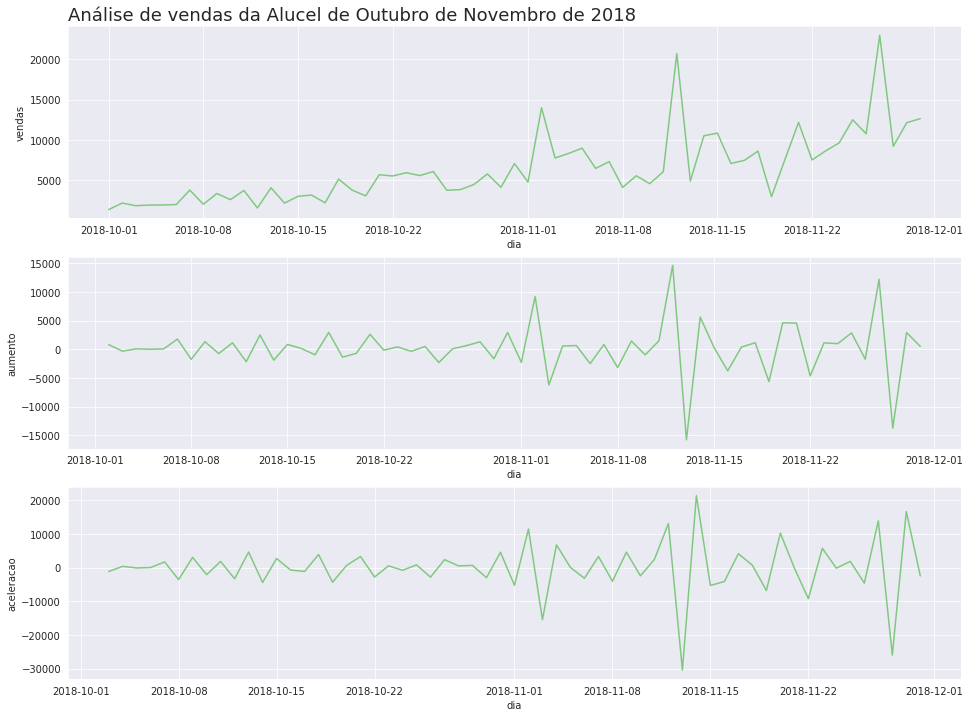

In [70]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', alucel, 'Análise de vendas da Alucel de Outubro de Novembro de 2018')

**Média móvel**

In [76]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()
alucel.head(7)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429


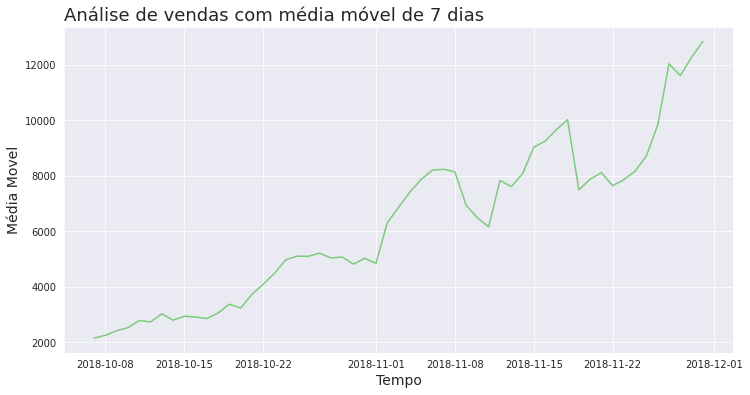

In [77]:
plotar('Análise de vendas com média móvel de 7 dias', 'Tempo', 'Média Movel', 'dia', 'media_movel', alucel)

In [78]:
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean()


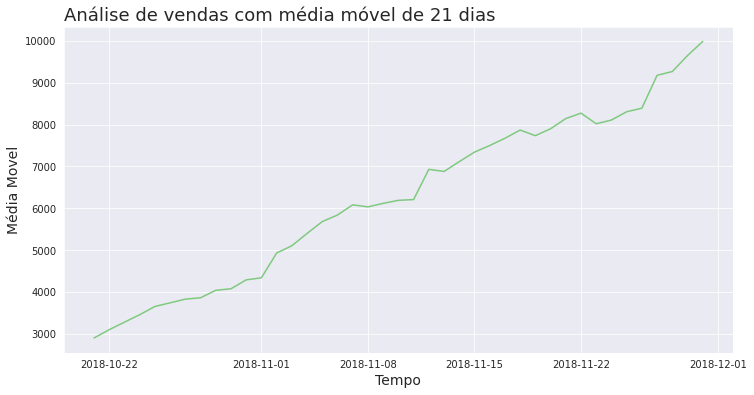

In [79]:
plotar('Análise de vendas com média móvel de 21 dias', 'Tempo', 'Média Movel', 'dia', 'media_movel_21', alucel)

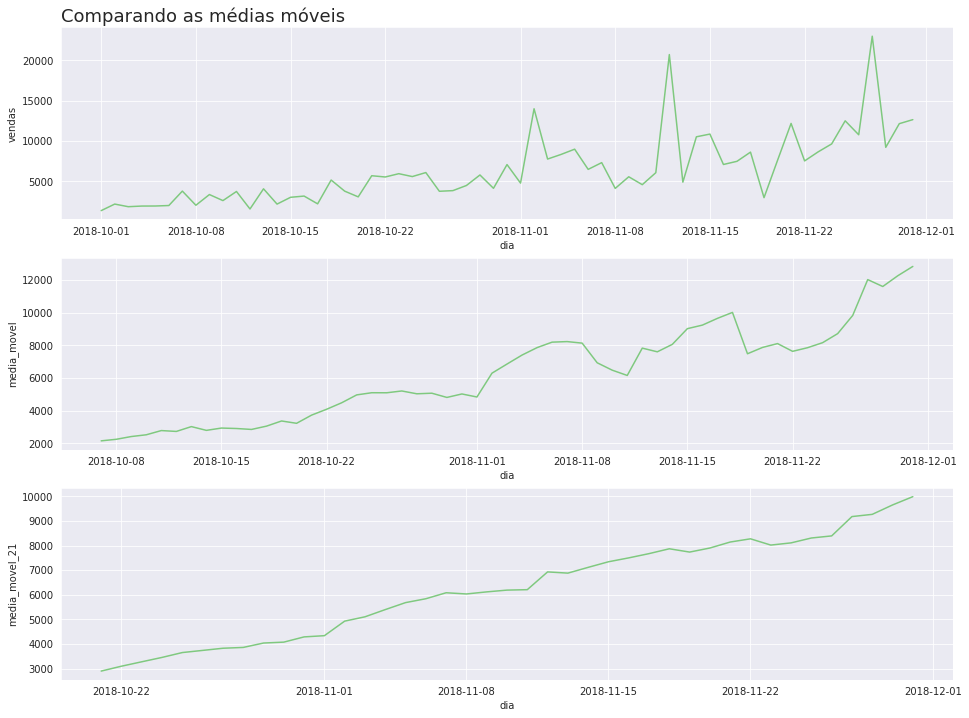

In [80]:
plot_comparacao('dia', 'vendas', 'media_movel', 'media_movel_21', alucel, 'Comparando as médias móveis')